In [23]:
import os
import json
import yaml
import glob
import time

import numpy as np

In [14]:
#embed_path = "../../data/embeddings/FSD50K.eval_audio/fs-essentia-extractor_legacy/100786-fs-essentia-extractor_legacy_frames.json"
embed_path = "../../data/embeddings/FSD50K.eval_audio/fs-essentia-extractor_legacy-PCA_846/100786.json"

with open(embed_path, 'r') as f:
    data = json.load(f)
print(json.dumps(data, indent=4))

In [11]:
data.keys()

dict_keys(['lowlevel', 'metadata', 'rhythm', 'sfx', 'tonal'])

In [8]:
data["lowlevel"].keys()

dict_keys(['average_loudness', 'startFrame', 'stopFrame', 'barkbands_kurtosis', 'barkbands_skewness', 'barkbands_spread', 'dissonance', 'hfc', 'pitch', 'pitch_instantaneous_confidence', 'pitch_salience', 'silence_rate_20dB', 'silence_rate_30dB', 'silence_rate_60dB', 'spectral_centroid', 'spectral_complexity', 'spectral_crest', 'spectral_decrease', 'spectral_energy', 'spectral_energyband_high', 'spectral_energyband_low', 'spectral_energyband_middle_high', 'spectral_energyband_middle_low', 'spectral_entropy', 'spectral_flatness_db', 'spectral_flux', 'spectral_kurtosis', 'spectral_rms', 'spectral_rolloff', 'spectral_skewness', 'spectral_spread', 'spectral_strongpeak', 'zerocrossingrate', 'barkbands', 'erb_bands', 'frequency_bands', 'gfcc', 'mfcc', 'scvalleys', 'spectral_contrast'])

In [21]:
embed_dir = "../../data/embeddings/FSD50K.eval_audio/fs-essentia-extractor_legacy"
embed_paths = glob.glob(os.path.join(embed_dir, "*.yaml"))

In [26]:
from pathlib import Path

# Use these statistics for each feature
PCA_DESCRIPTORS = [
    "mean",
    "dmean",
    "dmean2",
    "var",
    "dvar",
    "dvar2"
]

# Features that are multiple band
MBAND_FEATURES = [
    "barkbands",
    "erb_bands",
    "frequency_bands",
    "gfcc",
    "mfcc",
    "scvalleys",
    "spectral_contrast"
]

def select_subset(output):
    """ Selects a determined subset from a large set of features"""

    # For multiband features, collect PCA_DESCRIPTORS statistics of each band separately
    mband_feats = {}
    for feat in MBAND_FEATURES:
        n_bands = len(output["lowlevel"][feat][PCA_DESCRIPTORS[0]]) # Get the Number of bands
        for i in range(n_bands): # Access each band
            mband_feats[f"{feat}_{i}"] = {}
            for stat in PCA_DESCRIPTORS:
                mband_feats[f"{feat}_{i}"][stat] = output["lowlevel"][feat][stat][i]
        del output["lowlevel"][feat]
    # Insert the collection to the rest of the lowlevel features
    for k,v in mband_feats.items():
        output["lowlevel"][k] = v
    # Select the subset of features
    embed = {}
    for feat,feat_dct in output["lowlevel"].items():
        if type(feat_dct) == dict:
            embed[feat] = []
            for stat in PCA_DESCRIPTORS:
                embed[feat].append(feat_dct[stat])
    return embed

In [43]:
feat_dict = yaml.safe_load(Path(embed_paths[0]).read_text())
for feat in list(feat_dict["lowlevel"].keys()):
    print(feat)
    #print(feat_dict["lowlevel"][feat])
    #print()

average_loudness
barkbands_kurtosis
barkbands_skewness
barkbands_spread
dissonance
hfc
pitch
pitch_instantaneous_confidence
pitch_salience
silence_rate_20dB
silence_rate_30dB
silence_rate_60dB
spectral_centroid
spectral_complexity
spectral_crest
spectral_decrease
spectral_energy
spectral_energyband_high
spectral_energyband_low
spectral_energyband_middle_high
spectral_energyband_middle_low
spectral_entropy
spectral_flatness_db
spectral_flux
spectral_kurtosis
spectral_rms
spectral_rolloff
spectral_skewness
spectral_spread
spectral_strongpeak
startFrame
stopFrame
zerocrossingrate
barkbands
erb_bands
frequency_bands
gfcc
mfcc
scvalleys
spectral_contrast


In [44]:
print(json.dumps(feat_dict["lowlevel"], indent=4))

{
    "average_loudness": 0.107528716326,
    "barkbands_kurtosis": {
        "dmean": 1684.30517578,
        "dmean2": 2699.23266602,
        "dvar": 2218977.25,
        "dvar2": 5911768.5,
        "max": 7861.00976562,
        "mean": 1544.04333496,
        "min": -0.739031791687,
        "var": 3607942.5
    },
    "barkbands_skewness": {
        "dmean": 12.9216451645,
        "dmean2": 19.8922233582,
        "dvar": 86.5809707642,
        "dvar2": 274.370819092,
        "max": 57.8383216858,
        "mean": 21.0295734406,
        "min": 0.197354823351,
        "var": 256.28036499
    },
    "barkbands_spread": {
        "dmean": 3.96302032471,
        "dmean2": 4.34531879425,
        "dvar": 48.9754524231,
        "dvar2": 79.1596603394,
        "max": 54.075466156,
        "mean": 7.42149353027,
        "min": 0.00860519707203,
        "var": 207.340866089
    },
    "dissonance": {
        "dmean": 0.0322214365005,
        "dmean2": 0.0425742864609,
        "dvar": 0.00752806337

In [ ]:
dct = select_subset(feat_dict)

In [ ]:
with open("../../data/fs-essentia-features.txt", 'w') as f:
    for feat in sorted(list(dct.keys())):
        f.write(feat + "\n")

In [45]:
sum([None, None])

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

## Old

In [6]:
model_names = ["audioset-vggish-3", "audioset-yamnet-1",
               "fsd-sinet-vgg41-tlpf-1", "fsd-sinet-vgg42-aps-1", 
               "fsd-sinet-vgg42-tlpf_aps-1",
               "fsd-sinet-vgg42-tlpf-1", "openl3-env-mel128-emb512-3", 
               "openl3-env-mel256-emb512-3", "openl3-env-mel256-emb6144-3"]
for model_name in model_names:
    embed_paths = glob.glob(f"../data/embeddings/FSD50K.eval_audio/{model_name}/*.json")
    print(f"{model_name}")
    none_count, empty_count, full_count = 0,0,0
    empty_paths = []
    for embed_path in embed_paths:
        with open(embed_path, 'r') as infile: # Load the json file
            model_outputs = json.load(infile)
        frame_embeddings = model_outputs["embeddings"]
        if frame_embeddings is not None: # Filter out the None types
            # Aggregate frame level embeddings into a clip level embedding
            if len(frame_embeddings)!=0:
                full_count += 1
            else:
                empty_count+=1
                empty_paths.append(embed_path)
        else:
            none_count+=1
    print(none_count, empty_count, full_count)

audioset-vggish-3


0 0 10231
audioset-yamnet-1
0 0 10231
fsd-sinet-vgg41-tlpf-1
0 0 10231
fsd-sinet-vgg42-aps-1
0 0 10231
fsd-sinet-vgg42-tlpf_aps-1
0 0 10231
fsd-sinet-vgg42-tlpf-1
0 0 10231
openl3-env-mel128-emb512-3
0 0 10231
openl3-env-mel256-emb512-3


KeyboardInterrupt: 

In [7]:
model_names = ["audioset-vggish-3", "audioset-yamnet-1",
               "fsd-sinet-vgg41-tlpf-1", "fsd-sinet-vgg42-aps-1", 
               "fsd-sinet-vgg42-tlpf_aps-1",
               "fsd-sinet-vgg42-tlpf-1", "openl3-env-mel128-emb512-3", 
               "openl3-env-mel256-emb512-3", "openl3-env-mel256-emb6144-3"]
for model_name in model_names:
    embed_paths = glob.glob(f"../data/embeddings/FSD50K.eval_audio/{model_name}/*.json")
    print(f"{model_name}")
    none_count = 0
    for embed_path in embed_paths:
        with open(embed_path, 'r') as infile: # Load the json file
            model_outputs = json.load(infile)
        frame_embeddings = model_outputs["embeddings"]
        for frame_embedding in frame_embeddings:
            if frame_embedding is None:
                none_count+=1
                break
    print(none_count)

audioset-vggish-3
0
audioset-yamnet-1
0
fsd-sinet-vgg41-tlpf-1
0
fsd-sinet-vgg42-aps-1
0
fsd-sinet-vgg42-tlpf_aps-1
0
fsd-sinet-vgg42-tlpf-1
0
openl3-env-mel128-emb512-3
0
openl3-env-mel256-emb512-3
0
openl3-env-mel256-emb6144-3
0


## Old

In [17]:
fname = "120831"
embedding_dirs = [
    "../data/embeddings/FSD50K.eval_audio/fsd-sinet-vgg41-tlpf-1-Agg_mean-PCA_512-Norm_True/",
    "../data/embeddings/FSD50K.eval_audio/fsd-sinet-vgg41-tlpf-1-Agg_max-PCA_512-Norm_True/",
    "../data/embeddings/FSD50K.eval_audio/fsd-sinet-vgg41-tlpf-1-Agg_median-PCA_512-Norm_True/",
]

embeddings = []
for embedding_dir in embedding_dirs:
    embed_path = os.path.join(embedding_dir, fname+".json")
    # Load the analysis file
    with open(embed_path, 'r') as infile:
        embedding = json.load(infile)
    embeddings.append(np.array(embedding["embeddings"]))
    print(embeddings[-1].min(), embeddings[-1].max(), embeddings[-1].mean())


0.015871764875646198 0.10589754416291687 0.059716217392392246
0.021843192082395334 0.10467169313050508 0.06043425883655141
0.0113220138438606 0.11116205681585432 0.059331581404293746


In [21]:
fname = "120831"
embedding_dir = "../data/embeddings/FSD50K.eval_audio/fsd-sinet-vgg41-tlpf-1"

embed_path = os.path.join(embedding_dir, fname+".json")
# Load the analysis file
with open(embed_path, 'r') as infile:
    embedding = json.load(infile)
    embedding = np.array(embedding["embeddings"])
#embeddings.append(np.array(embedding["embeddings"]))
#print(embeddings[-1].min(), embeddings[-1].max(), embeddings[-1].mean())


In [23]:
embedding.shape

(34, 256)

In [27]:
np.mean(embedding, axis=0)

array([3.03794782, 1.83236279, 1.6576372 , 1.99497945, 0.85568451,
       2.32540963, 3.93974424, 3.095998  , 1.93480809, 1.61930263,
       3.15553421, 2.52310312, 2.97785604, 3.43842448, 2.55706962,
       3.4545751 , 2.10313044, 2.64810395, 2.42459751, 2.64253076,
       2.91888902, 1.88122564, 3.01968625, 2.70814097, 3.70458558,
       1.95839899, 1.89754679, 2.75365432, 1.96101526, 2.5503329 ,
       2.65943309, 2.10644197, 3.16143749, 1.90232027, 2.30201608,
       1.43414419, 2.6404371 , 1.67782417, 2.94025246, 3.7386567 ,
       2.32546958, 1.74817296, 2.55959022, 3.28389384, 1.94652253,
       2.09125882, 3.02174383, 1.88817398, 1.46387796, 2.32773161,
       3.81540449, 2.20241304, 2.93956507, 2.43211419, 2.8780639 ,
       2.2321734 , 1.09211285, 2.27416546, 1.89460245, 1.79515944,
       2.21736265, 1.7939351 , 1.22511198, 1.73556629, 3.2626074 ,
       2.15467567, 2.27655814, 2.31791633, 2.01020215, 1.88283779,
       2.97186754, 2.24502785, 1.08534806, 2.39649427, 1.19358

In [26]:
np.max(embedding, axis=0)-np.min(embedding, axis=0)

array([4.43455237, 2.08998871, 2.16765624, 2.47314948, 1.19962454,
       2.23840809, 3.85692525, 4.40242165, 3.69669533, 3.4170838 ,
       3.71203446, 3.37805283, 2.14294684, 3.69446528, 2.125723  ,
       3.85841107, 2.82188481, 3.67513084, 4.23854601, 2.31358755,
       3.66739708, 2.76405686, 3.8369137 , 3.45962095, 3.64021611,
       3.65116972, 2.59480351, 4.79069704, 2.96125644, 3.66483831,
       3.52809387, 1.88054144, 4.31918097, 2.43122476, 2.16450083,
       1.8433376 , 1.93998802, 3.40764579, 3.43969524, 5.3574549 ,
       2.7199235 , 2.84683305, 2.19694602, 3.91638362, 2.89973097,
       3.19456333, 3.47386229, 2.88446039, 3.3740021 , 2.40988433,
       4.5473212 , 3.46429962, 2.57064927, 1.87922394, 3.46647227,
       2.51822084, 1.27644995, 3.30649447, 2.68906796, 2.95633504,
       2.37067878, 2.63201243, 1.48765588, 2.90328187, 2.86022842,
       3.34891522, 3.39798343, 2.63448596, 2.72032356, 1.93482935,
       3.70548797, 2.08295536, 2.07940221, 2.71038795, 1.13360

In [2]:
def load_results(paths):
    """For each embedding analysis, load the results and store them in a dictionary. 
    Return a list of dictionaries, one for each embedding analysis."""

    model_results_dcts = []
    for path in paths:
        # Load the analysis file
        similarity_dict = {}
        with open(path ,"r") as infile:
            for jline in infile:
                result_dict = json.loads(jline)
                similarity_dict[result_dict["query_fname"]] = result_dict["results"]
        # Get the search type
        if result_dict["search"]=="nearest_neighbour":
            search = "Nearest Neighbor"
        elif result_dict["search"]=="dot_product":
            search = "Dot Product"
        else:
            raise ValueError(f"Unknown search type. {result_dict['search']}")
        # Get the embeddings name
        embeddings_name = os.path.basename(os.path.dirname(os.path.dirname(path)))
        # Append the results
        model_results_dcts.append({
                                "embeddings_name": embeddings_name, 
                                "search": search, 
                                "results": similarity_dict, 
                                "fnames": list(similarity_dict.keys()), 
                                })
    return model_results_dcts

In [4]:
model_results_dcts = load_results(["/home/roguz/freesound/freesound-perceptual_similarity/data/similarity_results/FSD50K.eval_audio/fs-essentia-extractor_legacy-PCA_100/nn/similarity_results.json"])

In [5]:
model_results_dcts[0]

{'embeddings_name': 'fs-essentia-extractor_legacy-PCA_100',
 'search': 'Nearest Neighbor',
 'results': {'404407': [{'result_fname': '378911',
    'score': 1.6204493571985708},
   {'result_fname': '75235', 'score': 1.6305457638127665},
   {'result_fname': '378912', 'score': 1.6603765231902214},
   {'result_fname': '424032', 'score': 1.6821976281435895},
   {'result_fname': '366677', 'score': 1.686443361817842},
   {'result_fname': '382982', 'score': 1.6956885475597738},
   {'result_fname': '121558', 'score': 1.697720787509944},
   {'result_fname': '88528', 'score': 1.7047152840611097},
   {'result_fname': '430049', 'score': 1.7295014254677823},
   {'result_fname': '186096', 'score': 1.730786062326554},
   {'result_fname': '83512', 'score': 1.7442694065615483},
   {'result_fname': '82418', 'score': 1.7488446124034072},
   {'result_fname': '120504', 'score': 1.7615760322679141},
   {'result_fname': '47050', 'score': 1.763452219364162},
   {'result_fname': '39319', 'score': 1.7651411336721

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model = os.path.basename(args.path)
data = os.path.basename(os.path.dirname(args.path))
title=f'FSD50K.{data} - {model} Embeddings PCA Scree Plot'
pca = PCA(n_components=None, copy=True)
pca.fit(embeddings)
PC_values = np.arange(pca.n_components_) + 1
cumsum_variance = 100*np.cumsum(pca.explained_variance_ratio_)
fig,ax = plt.subplots(figsize=(15,8), constrained_layout=True)
fig.suptitle(title, fontsize=20)
ax.plot(PC_values, cumsum_variance, 'ro-', linewidth=2)
ax.set_xlim([-5,len(PC_values)+5])
ax.set_yticks(np.arange(0,105,5)) # 5% increase
ax.set_xlabel('Number of Principal Components Selected', fontsize=15)
ax.set_ylabel('% Cumulative Variance Explained', fontsize=15)
ax.grid()
figure_path = os.path.join(output_dir, f'FSD50K.{data}-{model}-scree_plot.jpeg')
print(f"Exported the figure to: {figure_path}")
fig.savefig(figure_path)

In [16]:
x = "/home/roguz/freesound/freesound-perceptual_similarity/data/embeddings/FSD50K.eval_audio/fsd-sinet-vgg42-aps-1"
files = os.listdir(x)

In [17]:
with open(os.path.join(x, files[0])) as f:
    metadata = json.load(f)
np.array(metadata["embeddings"]).shape

(7, 512)

In [6]:
import os
import json
import glob
import time

import numpy as np
import pandas as pd
#from scipy import stats
import matplotlib.pyplot as plt

DATASET_DIR = "/data/FSD50K"
ANALYZER_NAME = 'audioset-yamnet_v1'
EMBEDDINGS_DIR = f"/home/roguz/freesound-perceptual_similarity/embeddings/{ANALYZER_NAME}"
#AUDIO_DIR = "/data/FSD50K/FSD50K.eval_audio"

In [47]:
def aggregate_frames(embeds, normalize=True, aggregation="none"):
    """ Takes a list of embeddings and aggregates them into a clip level embedding.
    """
    ax = 0 # Normalization axis for aggregation
    # Convert to numpy array
    if type(embeds)==list:
        embeds = np.array(embeds)
    # Aggreagate
    if aggregation=="mean":
        embeds = embeds.mean(axis=0)
    elif aggregation=="median":
        embeds = np.median(embeds, axis=0)
    else:
        ax = 1
    # Normalize each time frame by itself if specified
    if normalize:
        embeds = embeds/np.linalg.norm(embeds,axis=ax)[..., np.newaxis]
    return embeds

# TODO: Nearest Neighbor, ANN
def find_similar_sounds(query, corpus, N):
    # Compute pairwise dot similarities of normalized embeddings
    similarities = [np.dot(query, ref) for ref in corpus]
    indices = np.argsort(similarities)[::-1][1:N+1] # Top N sounds, except itself
    return similarities, indices

In [9]:
with open(f"{DATASET_DIR}/FSD50K.metadata/eval_clips_info_FSD50K.json" ,"r") as infile:
    metadata_dict = json.load(infile)
print(len(metadata_dict))

df = pd.read_csv("/data/FSD50K/FSD50K.ground_truth/eval.csv")
print(df.shape)
df.head()

embeddings_dir = os.path.join(EMBEDDINGS_DIR, "eval")

# Read all the json files in the tree
embed_paths = glob.glob(os.path.join(embeddings_dir, "**", "*.json"), recursive=True)
print(f"{len(embed_paths)} embeddings were found.")

10231
(10231, 3)
10231 embeddings were found.


In [48]:
aggr = "mean"

# Load the embeddings and process them
print("Reading the embeddings and pre-processing them...")
start_time = time.time()
embeddings, audio_paths, str_len = [], [], 0
for embed_path in embed_paths:
    with open(embed_path, 'r') as infile: # Load the json file
        model_outputs = json.load(infile)
    if model_outputs['embeddings'] is not None: # Filter out the None types
        clip_embedding = aggregate_frames(model_outputs["embeddings"], 
                                            aggregation=aggr)
        embeddings.append(clip_embedding)
        audio_paths.append(model_outputs["audio_path"])
        if len(model_outputs["audio_path"]) > str_len: # For pretty print
            str_len = len(model_outputs["audio_path"])
print(f"{len(embeddings)} embeddings were read.")
total_time = time.time()-start_time
print(f"Total pre-processing time: {time.strftime('%H:%M:%S', time.gmtime(total_time))}")

# Check normalization
for i,query in enumerate(embeddings):
    if aggr=="none" and np.sum(np.abs(norm-1))>0.0001*len(query):
        norm = np.linalg.norm(query, axis=1)
        print(norm)
    elif np.abs(norm-1)>0.0001:
        norm = np.linalg.norm(query)
        print(norm)


Reading the embeddings and pre-processing them...
10231 embeddings were read.
Total pre-processing time: 00:00:19


In [50]:
N = 25
query = embeddings[0]
print(np.linalg.norm(query))
similarities = np.array([np.dot(query, ref) for ref in embeddings])
indices = np.argsort(similarities)[::-1][1:N+1] # Top N sounds, except itself

0.9999999999999999


In [58]:
N = 25

print("\nFor each item, finding similar sounds...")
start_time = time.time()
similarity_scores, similarity_indices = [], []
for i,query in enumerate(embeddings):
    #if i%1000==0:
    #    print(f"[{i:>{len(str(1000))}}/{len(embeddings)}]")
    if i==100:
        break
    similarities, indices = find_similar_sounds(query, embeddings, N)
    similarity_scores.append(similarities)
    similarity_indices.append(indices)
total_time = time.time()-start_time
print(f"Total computation time: {time.strftime('%H:%M:%S', time.gmtime(total_time))}")
print(f"Average time/file: {total_time/len(embeddings):.3f} sec.")
print()


For each item, finding similar sounds...
Total computation time: 00:00:01
Average time/file: 0.000 sec.



In [65]:
print(len(similarity_scores[0]))
print(len(similarity_indices[0]))

10231
25


In [66]:
similarity_indices[0]

array([ 848, 6102,  425, 1086, 7903, 4853, 2361,  396, 4388, 2994, 9531,
       9276, 7616, 8491, 5025, 1677, 8889, 5683,   93, 4430, 6474, 1600,
       2028, 7211, 2798])

In [ ]:
# Print top args.N sounds for each sound
for i,(similarities,indices) in enumerate(zip(similarity_scores,similarity_indices)):
    print(f"{'T':>{len(str(N))+1}} | {audio_paths[i]}")
    for n,j in enumerate(indices):
        s = np.round(similarities[j],3) # round for display
        print(f"{'Q'+str(n):>{len(str(N))+1}} | {audio_paths[j]:<{str_len}} | {s}")
    print("\n")

# Embedding Analysis

In [73]:
all_embeddings = np.array([embed for embeds in embeddings for embed in embeds["embeddings"]])
print(all_embeddings.shape)

total_non_zero_ratio = np.count_nonzero(all_embeddings)/all_embeddings.size
print(total_non_zero_ratio)

non_zero_ratios = np.count_nonzero(all_embeddings,axis=0)/all_embeddings.shape[0]
print(len(np.where(non_zero_ratios<0.01)[0]))

(103266, 1024)
0.1547012747267978
39


In [75]:
len(np.where(non_zero_ratios<0.05)[0])

315

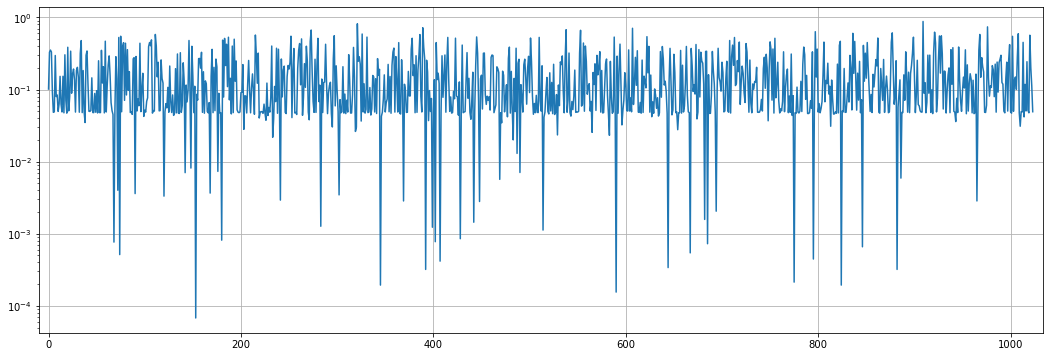

In [69]:
fig,ax=plt.subplots(nrows=1,figsize=(18,6))
ax.plot(non_zero_ratios)
ax.set_yscale('log')
ax.set_xlim([-10,all_embeddings.shape[1]+10])
ax.grid()
plt.show()

In [35]:
all_embeddings = np.array([embed for embeds in embeddings for embed in embeds["embeddings"]])
print(all_embeddings.shape)

non_zero_ratio = np.count_nonzero(all_embeddings)/all_embeddings.size
print(non_zero_ratio)

(103266, 1024)
0.1547012747267978


In [46]:
means=all_embeddings.mean(axis=0)
maxs=all_embeddings.max(axis=0)
mins=all_embeddings.min(axis=0)
medians=np.median(all_embeddings,axis=0)
modes=stats.mode(all_embeddings,axis=0)[0].reshape(-1)
print(np.any(mins))

False


In [40]:
import matplotlib.pyplot as plt
from scipy import stats

/home/roguz/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


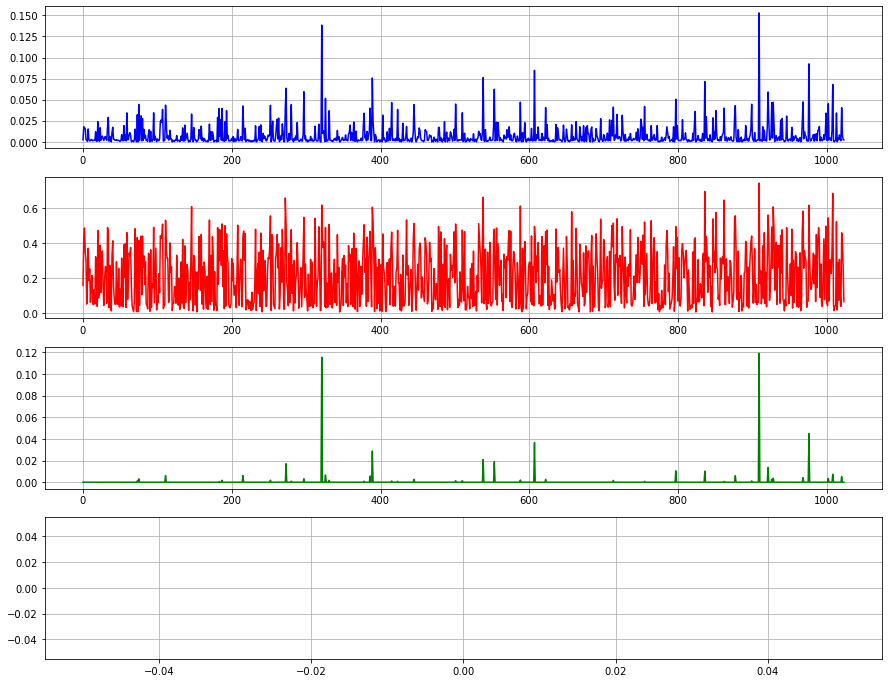

In [42]:
fig,axs=plt.subplots(nrows=4,figsize=(15,12))
axs[0].plot(means, color="b")
axs[0].grid()
axs[1].plot(maxs, color="r")
axs[1].grid()
axs[2].plot(medians,color="g")
axs[2].grid()
axs[3].plot(modes,color="g")
axs[3].grid()
plt.show()

## Empty embedding analysis

In [6]:
none_count, empty_count, full_count = 0,0,0
empty_paths = []
for embed_path in embed_paths:
    with open(embed_path, 'r') as infile: # Load the json file
        model_outputs = json.load(infile)
    if model_outputs['embeddings'] is not None: # Filter out the None types
        # Aggregate frame level embeddings into a clip level embedding
        frame_embeddings = model_outputs["embeddings"]
        if len(frame_embeddings)!=0:
            full_count += 1
        else:
            empty_count+=1
            empty_paths.append(embed_path)
            
    else:
        none_count+=1
print(none_count, empty_count, full_count)

In [12]:
fnames_ = []
for line in empty_paths:
    fnames_.append(int(os.path.splitext(os.path.basename(line))[0]))
   #audio_path = os.path.join(AUDIO_DIR,f"{fname}.wav")
   #loader.configure(filename=audio_path, sampleRate=16000, endTime=30, replayGain=0)
   #audio = loader()
   #if audio.shape[0]<16000:
   #    audio = np.concatenate((audio, np.zeros((16000-audio.shape[0]))))
   #print(model_embeddings(audio).shape)

In [16]:
df_shorts = df[df["fname"].isin(fnames_)]

In [17]:
df_shorts.to_csv("short_clips.csv",index=False)

with open(f"{ANALYZER_NAME}-FSD50K-empty_embeds.txt","w") as outfile:
    for embed_path in empty_paths:
        outfile.write(embed_path+"\n")